In [1]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers, optimizers

import matplotlib.pyplot as plt

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# Mnist数据集加载
(x_train_all, y_train_all), (x_test, y_test) = keras.datasets.mnist.load_data()
# Mnist数据集简单归一化
x_train_all, x_test = x_train_all[:10000] / 255.0, x_test[:10000] / 255.0

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]  #验证集10000个
y_valid, y_train = y_train_all[:5000], y_train_all[5000: 10000]

#打印一张照片
# def show_single_image(img_arr):
#      plt.imshow(img_arr,cmap='binary')
#      plt.show()
# show_single_image(x_train[2])

# 将模型的各层堆叠起来，以搭建 tf.keras.Sequential 模型。为训练选择优化器和损失函数：
model = models.Sequential([layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dropout(0.5),
                           layers.Dense(10, activation='softmax')
])
# 编译模型
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 打印网络参数量
model.summary()
print(len(model.layers))
# 训练模型
history = model.fit(x_train, y_train, epochs=20, validation_freq=1,
                  validation_data=(x_valid,y_valid))
# 验证模型：
model.evaluate(x_test,  y_test, verbose=2)


history_dict = history.history         # history对象有一个history成员，它是一个字典，包含训练过程中的所有数据。
# print(history_dict)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
4
Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 1s 208us/sample - loss: 1.9676 - accuracy: 0.3456 - val_loss: 1.5110 - val_accuracy: 0.6944
Epoch 2/20
5000/5000 [============================

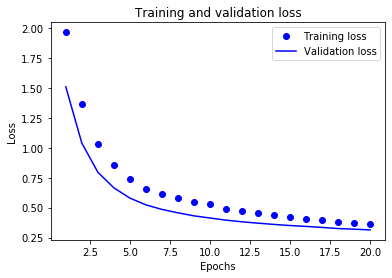

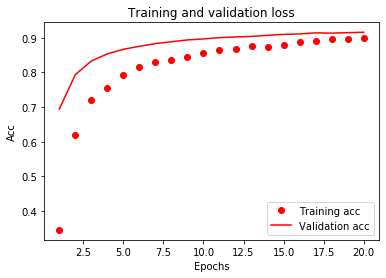

In [2]:
# 绘制loss曲线
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')         # bo代表蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')    # bo代表蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制acc曲线
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'ro', label='Training acc')           # bo代表蓝色圆点
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')      # bo代表蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()